In [1]:
import pandas as pd
from pathlib import Path

# Import the new classes
from omero_screen_plots import cellcycle_plot, cellcycle_stacked, cellcycle_grouped
path = Path("../images")
path.mkdir(parents=True, exist_ok=True)


['#526C94', '#D8C367', '#75B1CE', '#DC6B83', '#D4D3CF', '#00bfb2', '#CCDBA2', '#889466', '#C6B2D1', '#654875']


In [2]:
df = pd.read_csv("../data/sample_plate_data.csv")

conditions = [
    "palb:0.0 c604:0",
    "palb:0.0 c604:1",
    "palb:0.75 c604:0",
    "palb:0.75 c604:1",
]

## Standard Cell Cycle Plot
Useful for statistical analysis but not intuitive to visualize complex experiments with many conditions.

### Function Arguments

#### Data Selection
- `df`: DataFrame containing cell cycle data
- `conditions`: List of condition names to plot
- `condition_col`: Column name for experimental condition
- `selector_col`: Column name for selector (e.g., cell line)
- `selector_val`: Value to filter selector_col by

#### Figure Styling
- `title`: Plot title
- `fig_size`: Dimensions of the figure (default: 6 cm wide and 4 cm high)
- `size_units`: Units of the figure size (default: "cm")
- `colors`: List of colors for plotting (default provided by matplotlib style sheet)

#### Saving Functionality
- `save`: Boolean whether to save the figure (default: False)
- `path`: Path to save the figure (required when save=True)
- `tight_layout`: Boolean to turn on/off tight layout function (default: False)
- `file_format`: Format of the figure (default: "pdf")
- `dpi`: Resolution of the figure (default: 300)

Plotting cell cycle quantifications for MCF10A
Saving figure Standard_cellcycleplot_example


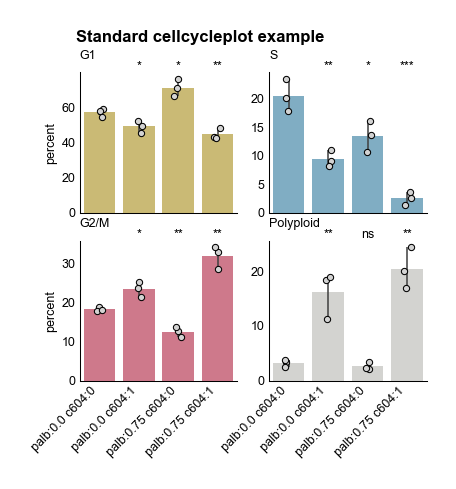

In [3]:
cellcycle_plot(
    df=df,
    conditions=conditions,
    condition_col="condition",
    selector_col="cell_line",
    selector_val="MCF10A",
    title="Standard cellcycleplot example",
    fig_size=(6, 6),
    size_units="cm", # cm or inches (default cm)
    save=True,
    path=path,
    tight_layout=False,
    file_format="png", # default pdf
    dpi=100, # resolution of the figure (default 300)
)

## Cell cycle stacked plot example

Useful for compact display of phenotypes. Grouping can be used to convey further insights.
Error bars based ons stdv optional. No statistical analytsis since plotting the differnet
p-values for indvidual phases on top of each other would crowd out the plot too much.


### Function arguments

#### Data Selection
- df: DataFrame containing cell cycle data.
- conditions: List of condition names to plot.
- condition_col: Column name for experimental condition.
- selector_col: Column name for selector (e.g., cell line).
- selector_val: Value to filter selector_col by.
- y_err: Whether to show error bars. Default is True.
- H3: if H3 pS10 data available separate G2 and M phase 
#### Figure Styling
- title: Plot title.
- fig_size: Dimensions of the figure. 
- size_units: Units of the figure size. Default is "cm".
- colors: List of colors for plotting. Default provided by matplotlib style sheet
#### Saving functionality
- save: Boolean whether to save the figure. Default False
- path: Path to save the figure. required when save = True
- tight_layout: Whether to use tight layout. Default is False.
- file_format: Format of the figure. Default is "pdf".
- dpi: Resolution of the figure. Default is 300.
#### Grouping 
- group_size: Number of conditions per group on the x-axis (default 1 = no grouping).
- within_group_spacing: Spacing between bars within a group (default 0.5).
- between_group_gap: Spacing between groups (default 1.0).
- bar_width: Width of each bar (default 0.5).


In [4]:
# longer conditions to demonstrate grouping

conditions_all = [
    "palb:0.0 c604:0",
    "palb:0.0 c604:1",
    "palb:0.375 c604:0",
    "palb:0.375 c604:1",
    "palb:0.75 c604:0",
    "palb:0.75 c604:1",
    "palb:1.5 c604:0",
    "palb:1.5 c604:1",
]


Saving figure Cell_cycle_stacked_plot_example


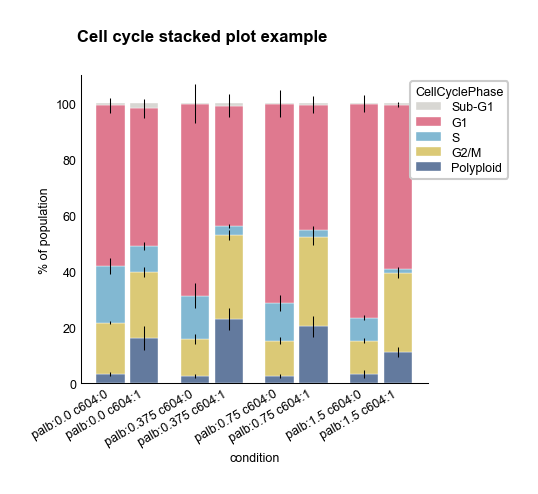

In [5]:
cellcycle_stacked(
    df=df,
    conditions=conditions_all,
    condition_col="condition",
    selector_col="cell_line",
    selector_val="MCF10A",
    y_err=True,
    H3=False, # if H3 pS10 data available separate G2 and M phase 
    title="Cell cycle stacked plot example", 
    fig_size=(6, 6),
    size_units="cm",
    save=True,
    path=path,
    tight_layout=False,
    file_format="png",
    dpi=100,
    group_size= 2, # number of conditions per group on the x-axis (default 1 = no grouping)
    within_group_spacing=0.1, # spacing between bars within a group (default 0.5)
    between_group_gap=0.4, # spacing between groups (default 1.0)
    bar_width=0.5, # width of each bar (default 0.5)
)

## cellcycle_grouped 

Gives most detailed information in repeats, only use when three repeats available! Again for proper statistics use the standard plot and perhaps show as a supplemental Figure.

When providing an ax paranter, this plot can also be integrated with other plots into a larger panel.

### Function arguments

#### Data Selection
df: DataFrame containing cell cycle data.
conditions: List of condition names to plot.
group_size: Number of conditions per group on the x-axis.
condition_col: Column name for experimental condition.
selector_col: Column name for selector (e.g., cell line).
selector_val: Value to filter selector_col by.
phases: List of cell cycle phases.
#### Figure Styling
title: Plot title.
ax: Matplotlib axis. If None, a new figure is created.
x_label: Whether to show the x-axis label. Default is True.
fig_size: Dimensions of the figure. Default is 6 cm wide and 4 cm high.
size_units: Units of the figure size. Default is "cm".
colors: List of colors for plotting.
#### Saving functionality
save: Whether to save the figure.
path: Path to save the figure.
tight_layout: Whether to use tight layout. Default is False.
file_format: Format of the figure. Default is "pdf".
dpi: Resolution of the figure. Default is 300.
#### Grouping
repeat_offset: Offset for repeat bars.
within_group_spacing: Spacing between bars within a group.
between_group_gap: Spacing between groups.
x_label: Whether to show the x-axis label. Default is True.


Saving figure Cell_cycle_grouped_plot_example


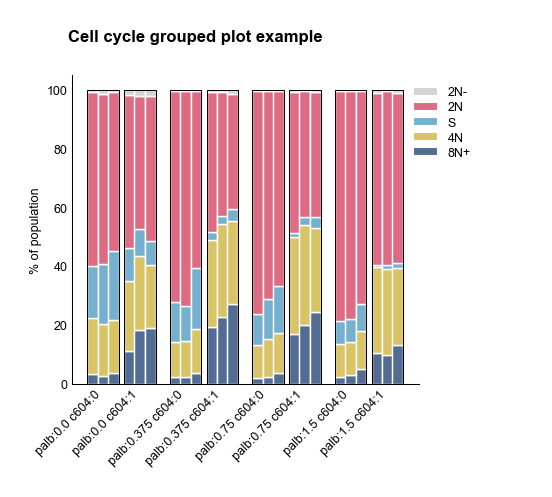

In [12]:
cellcycle_grouped(
    df=df,
    conditions=conditions_all,
    condition_col="condition",
    selector_col="cell_line",
    selector_val="MCF10A",
    title="Cell cycle grouped plot example", 
    ax = None,
    fig_size=(6, 6),
    size_units="cm",
    save=True,
    path=path,
    tight_layout=False,
    file_format="png",
    dpi=100,
    repeat_offset=0.18,
    within_group_spacing=0.14,
    between_group_gap=0.3,
)